## ※부스팅 4종류 개요
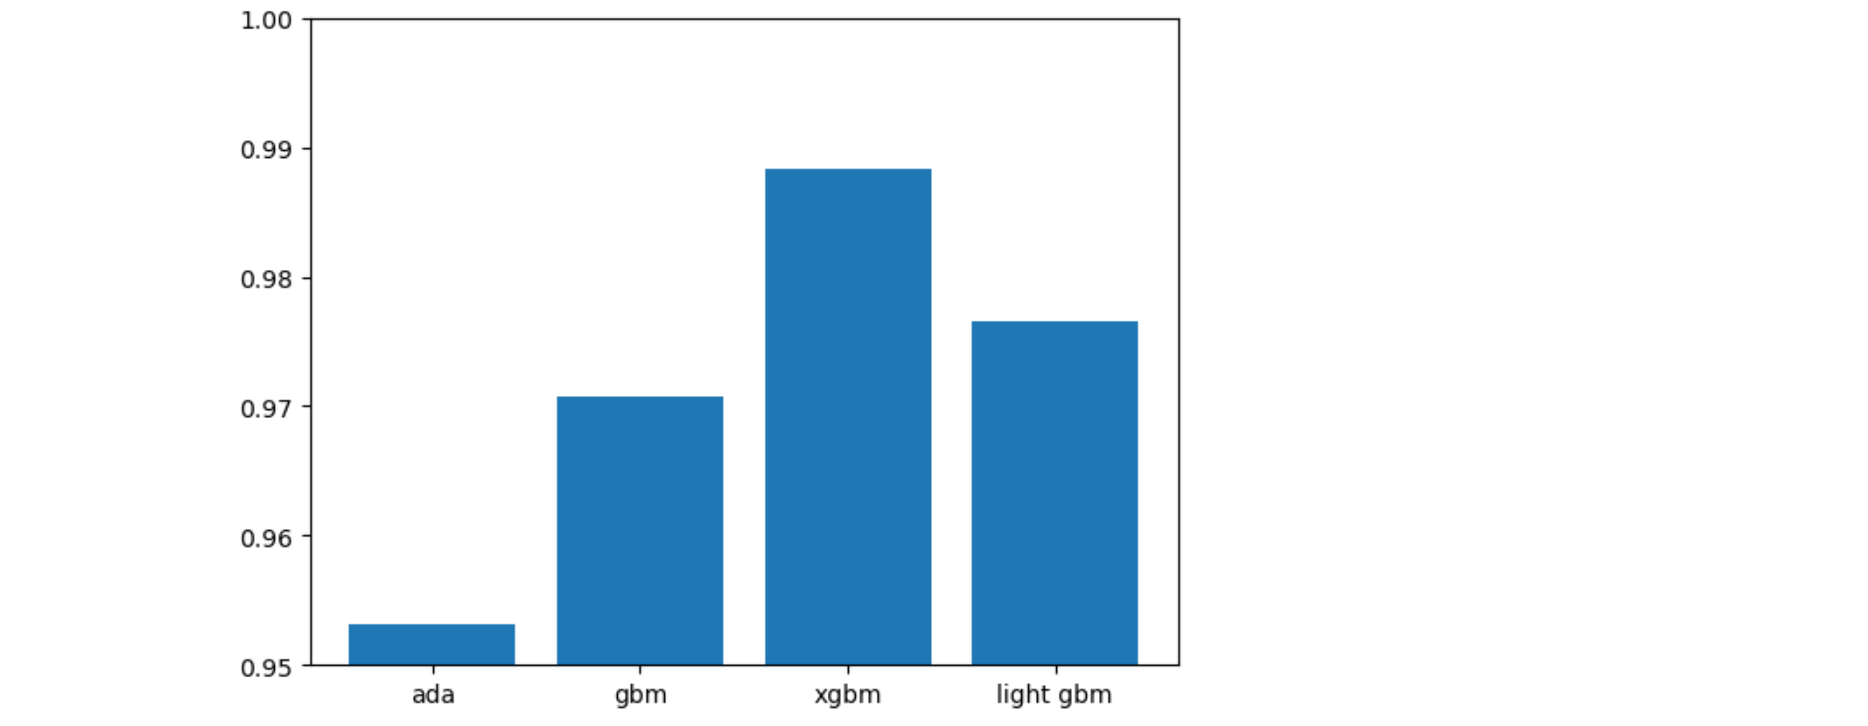

### 사전작업 (~ex08. Ensemble 유방암 분류 실습)

In [1]:
# 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
cancer_data.target_names, np.bincount(cancer_data.target)
X = cancer_data.data
y = cancer_data.target
X_train, X_test = train_test_split(X, test_size=0.3, random_state=10)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=10)

### AdaBoost 모델 적용하기
- 결정트리 기반의 모델이지만, 각각의 트리들이 독립적으로 존재하지 않음
- 사전 가지치기 파라미터들을 사용할 수 없음
- 이전 모델이 잘못 분류한 샘플에 가중치를 높여서 다른 모델을 훈련시킴
- n_estimators : 사용할 결정트리의 갯수
- learning_rate(학습률) : 가중치 갱신의 변동폭을 조정
    - 0~1 사이의 값, 기본값 1
    - 값이 크면   ==> 과대적합
    - 값이 작으면 ==> 과소적합

In [2]:
col = ['ada', 'gbm', 'xgbm', 'light gbm']
lst = []

In [3]:
# AdaBoost 불러오기
from sklearn.ensemble import AdaBoostClassifier

# 모델생성 및 하이퍼파라미터 설정
ada_model = AdaBoostClassifier(n_estimators= 50, random_state= 10)
ada_model.fit(X_train, y_train)


train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))
lst.append(accuracy_score(y_test, test_pred))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.953


### GBM 모델 적용하기
- 여러개의 결정트리를 묶어서 강력한 모델을 만드는 앙상블 방법
- 강력한 사전 가지치기 적용(max_depth의 기본값 : 3)
- 예측 성능은 높지만 과대적합이 빠르게 되고, 시간이 오래 걸린다는 단점
- max_depth를 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 해야 함
- 가중치를 계산할 때 경사하강법 사용


In [4]:
# GBM 모델 불러오기
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성 및 하이퍼파라미터 설정(기본 모델로만 할것임)
gbm_model = GradientBoostingClassifier(random_state= 10)
gbm_model.fit(X_train, y_train)


train_pred = gbm_model.predict(X_train)
test_pred = gbm_model.predict(X_test)
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))
lst.append(accuracy_score(y_test, test_pred))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.971


### XGBoost 모델 적용하기
- 결정트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘(모델)의 하나
- 분류에 있어서 일반적으로 다른 머신러닝 모델보다 뛰어난 성능을 나타냄
- GBM 기반이지만 GBM의 단점을 해결
    - 느린 학습시간 ==> Early Stopping 기능
    - 과대적합 ==> 과대적합을 방지하는 규제가 포함
- 대규모 머신러닝 문제에서 GBM을 적용하는 경우 ==> XGBoost 사용

In [5]:
# sklearn에서 제공하지 않는 모듈
# XGBoost 패키지 설치
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [6]:
# GBM 모델 불러오기
from xgboost import XGBClassifier

# 모델 생성 및 하이퍼파라미터 설정(기본 모델로만 할것임)
xgbm_model = XGBClassifier(random_state= 10)
xgbm_model.fit(X_train, y_train)

train_pred = xgbm_model.predict(X_train)
test_pred = xgbm_model.predict(X_test)
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))
lst.append(accuracy_score(y_test, test_pred))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.988


### Light GBM 적용하기
- XGBoost에 비해 가벼워 속도가 빠른 모델
- 비대칭(수직)트리분할로 균형을 맞추지 않음 ==> 속도가 빠름
- 학습을 반복할수록 균형트리보다 예측오류의 손실 최소화
- 깊이가 깊은 비대칭트리 생성 ==> 과적합이 쉽다

In [7]:
# Light GBM 패키지 설치하기
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [8]:
# Light GBM 불러오기
import lightgbm
from lightgbm.sklearn import LGBMClassifier

# 모델 생성 및 하이퍼 파라미터 설정(x)
lgbm_model = LGBMClassifier(random_state= 10)
lgbm_model.fit(X_train, y_train)

train_pred = lgbm_model.predict(X_train)
test_pred = lgbm_model.predict(X_test)
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))
lst.append(accuracy_score(y_test, test_pred))

[LightGBM] [Info] Number of positive: 245, number of negative: 153
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615578 -> initscore=0.470820
[LightGBM] [Info] Start training from score 0.470820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

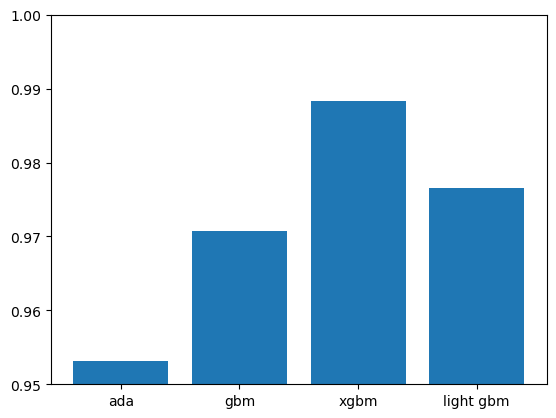

In [9]:
import matplotlib.pyplot as plt
plt.bar(col,lst)
plt.ylim(0.95, 1.0)
plt.show()